In [4]:
# load_digits dataset, which is a collection of 8x8 images (64 features)of digits. The dataset contains a total of 1797 sample points.
from sklearn.datasets import load_digits
digits = load_digits()

<Figure size 432x288 with 0 Axes>

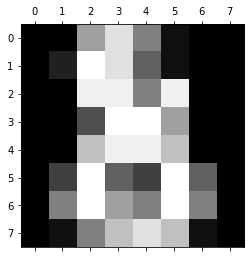

In [11]:
#visualize the  image of the handwritten digits stored in images
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[1796]) 
plt.show()


In [13]:
# retrive the label of image
digits.target[1796]

8

In [16]:
#list all of the labels
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
#Importing Relevant Libraries & Modules

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [26]:
#prepare the data for training by declaring a NumPy array data and reshaping it so that it has the first dimension equal to the length of the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [30]:
#Splitting Data into Train and Test 50% training and 50% testing data
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.3, shuffle=False)

In [31]:
#Classification Report will give us the precision, recall, f1-score, support, and accuracy
#the Confusion Matrix will show us the number of True Positives, False Positives, and False Negatives for each Classifier
# We will use the following classifiers from Sklearn:
# Support Vector Machine
# Gaussian Naive Bayes
# Decision Trees
# Random Forest
# K Nearest Neighbours
# Stochastic Gradient Descent


Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        53
           2       1.00      0.98      0.99        53
           3       0.96      0.89      0.92        53
           4       0.98      0.95      0.96        57
           5       0.95      0.98      0.96        56
           6       0.98      0.98      0.98        54
           7       1.00      1.00      1.00        54
           8       0.91      0.98      0.94        52
           9       0.96      0.96      0.96        55

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



Confusion matrix:
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 53  0  0  0  0  0  0  0  0]
 [ 0  0 52  1  0  0  0  0  0  0]
 [ 0  0  0 47  0  2  0  0  4  0]
 [ 0  0  0  0 54  0  0  0  1  2]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


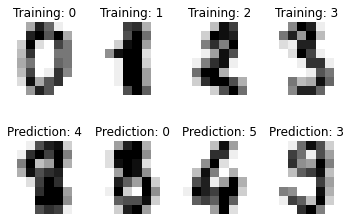

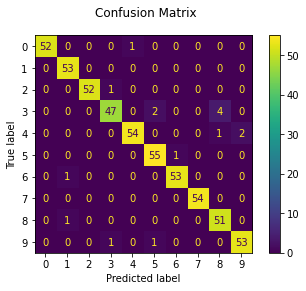

In [33]:
#1. Support Vector Machines (SVM)
from sklearn import svm
svm_classifier = svm.SVC(gamma=0.001)
svm_classifier.fit(X_train, y_train)
predicted = svm_classifier.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
print("\nClassification report for classifier %s:\n%s\n" % (svm_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(svm_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", svm_classifier.score(X_test, y_test))
plt.show()